In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/Kattur_test.csv')

In [ ]:
df.head()

,YEAR,MO,DY,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax,Date
0,2015,1,1,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76,01-01-2015
1,2015,1,2,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80,02-01-2015
2,2015,1,3,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38,03-01-2015
3,2015,1,4,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23,04-01-2015
4,2015,1,5,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59,05-01-2015


In [ ]:
df.drop(['YEAR','MO','DY'],axis=1,inplace=True)

In [ ]:
df.head()

,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax,Date
0,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76,01-01-2015
1,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80,02-01-2015
2,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38,03-01-2015
3,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23,04-01-2015
4,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59,05-01-2015


In [ ]:
df=df.iloc[:,[8,0,1,2,3,4,5,6,7],]
df.head()

,Date,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax
0,01-01-2015,22.40,31.52,25.59,16.85,3.02,3.05,3.71,6.76
1,02-01-2015,21.12,32.08,25.75,16.11,0.06,4.60,2.20,6.80
2,03-01-2015,20.40,31.94,25.35,15.20,0.00,5.96,0.41,6.38
3,04-01-2015,21.39,32.18,25.55,15.44,0.00,4.91,2.31,7.23
4,05-01-2015,20.50,31.94,25.13,14.77,0.00,3.62,3.97,7.59


In [ ]:
df.iloc[:, 1] = df.iloc[:, 1]*1.8+32
df.iloc[:, 2] = df.iloc[:, 2]*1.8+32
df.iloc[:, 3] = df.iloc[:, 3]*1.8+32
df.head()

,Date,tempmin,tempmax,temp,humi,preci,ws,wsmin,wsmax
0,01-01-2015,72.320,88.736,78.062,16.85,3.02,3.05,3.71,6.76
1,02-01-2015,70.016,89.744,78.350,16.11,0.06,4.60,2.20,6.80
2,03-01-2015,68.720,89.492,77.630,15.20,0.00,5.96,0.41,6.38
3,04-01-2015,70.502,89.924,77.990,15.44,0.00,4.91,2.31,7.23
4,05-01-2015,68.900,89.492,77.234,14.77,0.00,3.62,3.97,7.59


In [ ]:
figure = px.line(df, x="Date", 
                 y="preci", 
                 title='Mean in Trichy Over the Years')
figure.show()

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
forecast_data = df.rename(columns = {"Date": "ds", 
                                       "preci": "y"})
print(forecast_data)

              ds  tempmin  tempmax    temp   humi      y    ws  wsmin  wsmax
0     01-01-2015   72.320   88.736  78.062  16.85   3.02  3.05   3.71   6.76
1     02-01-2015   70.016   89.744  78.350  16.11   0.06  4.60   2.20   6.80
2     03-01-2015   68.720   89.492  77.630  15.20   0.00  5.96   0.41   6.38
3     04-01-2015   70.502   89.924  77.990  15.44   0.00  4.91   2.31   7.23
4     05-01-2015   68.900   89.492  77.234  14.77   0.00  3.62   3.97   7.59
...          ...      ...      ...     ...    ...    ...   ...    ...    ...
2993  16-03-2023   73.742   99.140  84.920  14.95   0.52  5.92   2.47   8.38
2994  17-03-2023   74.354  100.454  85.388  14.71   0.66  6.76   1.79   8.55
2995  18-03-2023   75.020   99.176  85.244  15.56   1.56  5.83   2.18   8.01
2996  19-03-2023   75.218   98.600  85.442  15.69  10.65  2.88   2.27   5.14
2997  20-03-2023   75.956   93.236  82.166  17.64  11.32  3.94   1.76   5.70

[2998 rows x 9 columns]


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

Streaming output truncated to the last 5000 lines.
Parsing '23-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing '24-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing '25-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing '26-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/prophet/forecaster.py:271: UserWarning:

Parsing '27-07-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9

In [ ]:
predictions.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,3.157313,-3.808930,9.140831,3.157313,3.157313,-0.138921,-0.138921,-0.138921,0.113157,0.113157,0.113157,-0.252078,-0.252078,-0.252078,0.0,0.0,0.0,3.018392
1,2015-01-02,3.155159,-3.901306,9.696889,3.155159,3.155159,-0.121381,-0.121381,-0.121381,0.056766,0.056766,0.056766,-0.178147,-0.178147,-0.178147,0.0,0.0,0.0,3.033778
2,2015-01-03,3.153005,-3.975162,9.141816,3.153005,3.153005,-0.318902,-0.318902,-0.318902,-0.199652,-0.199652,-0.199652,-0.119250,-0.119250,-0.119250,0.0,0.0,0.0,2.834103
3,2015-01-04,3.150851,-3.009479,9.663486,3.150851,3.150851,0.006332,0.006332,0.006332,0.082952,0.082952,0.082952,-0.076620,-0.076620,-0.076620,0.0,0.0,0.0,3.157182
4,2015-01-05,3.148697,-3.044820,10.085561,3.148697,3.148697,0.113046,0.113046,0.113046,0.164079,0.164079,0.164079,-0.051033,-0.051033,-0.051033,0.0,0.0,0.0,3.261743


In [ ]:
predictionsdf=predictions.iloc[:,[0,18],]
predictionsdf.tail()

,ds,yhat
3358,2024-11-28,5.246102
3359,2024-11-29,4.985690
3360,2024-11-30,4.504044
3361,2024-12-01,4.543564
3362,2024-12-02,4.367448


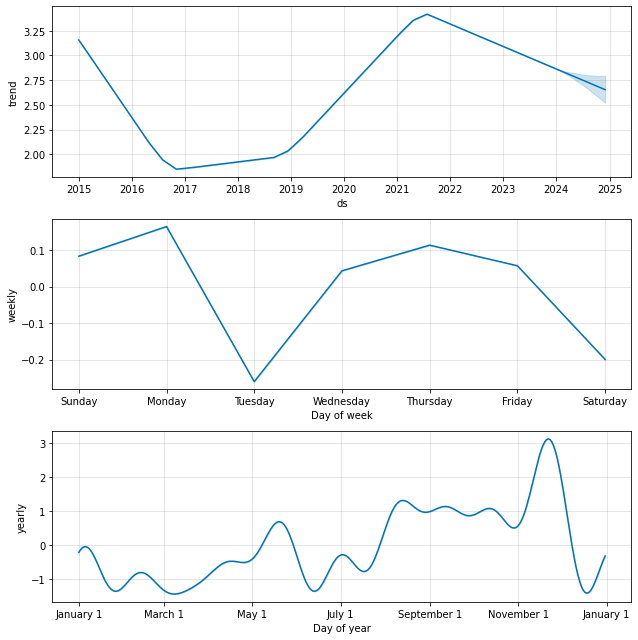

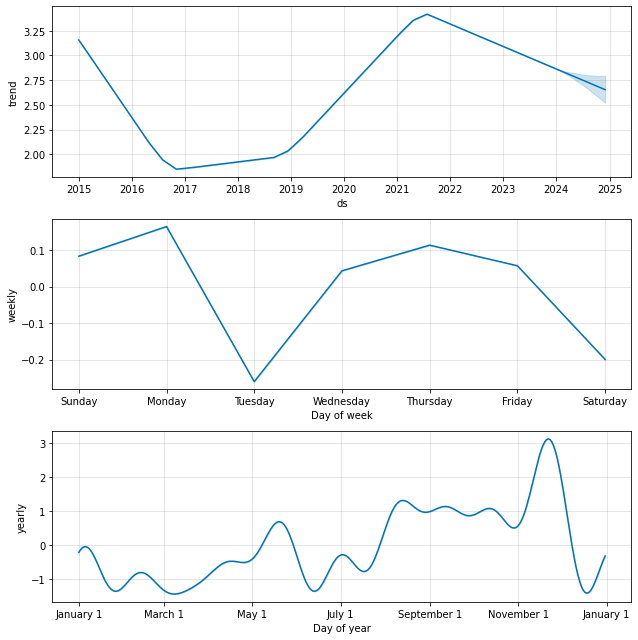

In [ ]:
model.plot_components(predictions)